<a href="https://colab.research.google.com/github/AnandaIlyasa/bangkit-capstone-bahanbaku/blob/main/notebooks/try_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

import tensorflow.keras.backend as K
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input

from tensorflow.keras import models

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline

In [ ]:
%%time
# Load saved model to make predictions

K.clear_session()
model = load_model('/content/drive/MyDrive/Colab Notebooks/trainedmodel_20class.hdf5',compile = False)

CPU times: user 9.82 s, sys: 764 ms, total: 10.6 s
Wall time: 13 s


In [ ]:
# gdrive mounting
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
food_list = ['apple_pie', 'bibimbap', 'bread_pudding', 'cheesecake', 'chicken_curry', 'chicken_wings', 'chocolate_cake', 'french_fries', 'garlic_bread', 'gnocchi', 'hamburger', 'omelette', 'pizza', 'samosa', 'shrimp_and_grits', 'strawberry_shortcake', 'tacos', 'tiramisu', 'tuna_tartare', 'waffles']

In [ ]:
def predict_class(model, images, show = True):
  for img in images:
    img = image.load_img(img, target_size=(299, 299))
    img = image.img_to_array(img)                    
    img = np.expand_dims(img, axis=0)         
    img = preprocess_input(img)                                      

    pred = model.predict(img)
    food_list.sort()

    top_n = 3
    indices = np.argpartition(pred, -top_n)[-top_n:]
    indices = np.squeeze(indices)
    indices = np.flip(indices)
    print(food_list[indices[0]])
    print(food_list[indices[1]])
    print(food_list[indices[2]])
    #print(pred)
    if show:
        plt.imshow(img[0].astype(np.uint8))                           
        plt.axis('off')
        # plt.title(pred_value)
        plt.show()

In [ ]:
print("\"", end="")
for food in food_list:
  print()

waffles
bread_pudding
french_fries


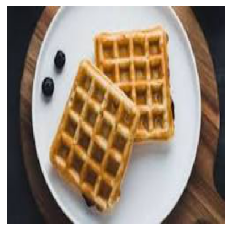

hamburger
apple_pie
cheesecake


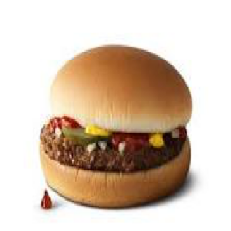

shrimp_and_grits
gnocchi
chicken_wings


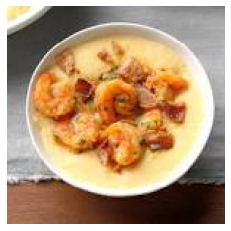

In [ ]:
images = []
images.append('/content/drive/MyDrive/Colab Notebooks/waffle.jpeg') #image path
images.append('/content/drive/MyDrive/Colab Notebooks/hamburger.jpeg') #image path
images.append('/content/drive/MyDrive/Colab Notebooks/shrimp_and_grits.jpeg') #image path
predict_class(model, images, True)